In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.callbacks import EarlyStopping


In [3]:
# reading data files and storing them in a dataframe
df_train_features = pd.read_csv('/Users/dhirenpagarani/Northeastern University/Fundamentals of Artificial Intelligence - EAI6000/lish-moa/train_features.csv')
df_test_features = pd.read_csv('/Users/dhirenpagarani/Northeastern University/Fundamentals of Artificial Intelligence - EAI6000/lish-moa/test_features.csv')
df_train_target_nonscored = pd.read_csv('/Users/dhirenpagarani/Northeastern University/Fundamentals of Artificial Intelligence - EAI6000/lish-moa/train_targets_nonscored.csv')
df_train_target_scored = pd.read_csv('/Users/dhirenpagarani/Northeastern University/Fundamentals of Artificial Intelligence - EAI6000/lish-moa/train_targets_scored.csv')
df_sample_submission = pd.read_csv('/Users/dhirenpagarani/Northeastern University/Fundamentals of Artificial Intelligence - EAI6000/lish-moa/sample_submission.csv')

In [4]:
import os
def seed_everything(seed=42):
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    
seed_everything(seed=42)

In [5]:
print('Train shape:',df_train_features.shape)
print('Test shape:',df_test_features.shape)

Train shape: (23814, 876)
Test shape: (3982, 876)


In [6]:
new_train_features = df_train_features.copy()
new_train_features

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,trt_cp,24,D1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,trt_cp,72,D1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,trt_cp,48,D1,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,trt_cp,48,D1,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,trt_cp,72,D2,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,trt_cp,24,D2,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,...,0.1969,0.0262,-0.8121,0.3434,0.5372,-0.3246,0.0631,0.9171,0.5258,0.4680
23810,id_fffb70c0c,trt_cp,24,D2,-1.3260,0.3478,-0.3743,0.9905,-0.7178,0.6621,...,0.4286,0.4426,0.0423,-0.3195,-0.8086,-0.9798,-0.2084,-0.1224,-0.2715,0.3689
23811,id_fffc1c3f4,ctl_vehicle,48,D2,0.3942,0.3756,0.3109,-0.7389,0.5505,-0.0159,...,0.5409,0.3755,0.7343,0.2807,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808
23812,id_fffcb9e7c,trt_cp,24,D1,0.6660,0.2324,0.4392,0.2044,0.8531,-0.0343,...,-0.1105,0.4258,-0.2012,0.1506,1.5230,0.7101,0.1732,0.7015,-0.6290,0.0740


In [7]:
# change cp_dose: D1 -> 0, D2 -> 1
new_train_features['cp_dose'] = new_train_features['cp_dose'].map({'D1':0, 'D2':1})
# change cp_time: 24 -> 0, 48 -> 1, 72 -> 2
new_train_features['cp_time'] = new_train_features['cp_time']//24-1
# drop the cp_type and sig_id column
new_train_features.drop(columns = ['sig_id','cp_type'], inplace = True)
new_train_features

,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,0,0,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,2,0,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,1,0,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,1,0,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,2,1,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,0,1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,...,0.1969,0.0262,-0.8121,0.3434,0.5372,-0.3246,0.0631,0.9171,0.5258,0.4680
23810,0,1,-1.3260,0.3478,-0.3743,0.9905,-0.7178,0.6621,-0.2252,-0.5565,...,0.4286,0.4426,0.0423,-0.3195,-0.8086,-0.9798,-0.2084,-0.1224,-0.2715,0.3689
23811,1,1,0.3942,0.3756,0.3109,-0.7389,0.5505,-0.0159,-0.2541,0.1745,...,0.5409,0.3755,0.7343,0.2807,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808
23812,0,0,0.6660,0.2324,0.4392,0.2044,0.8531,-0.0343,0.0323,0.0463,...,-0.1105,0.4258,-0.2012,0.1506,1.5230,0.7101,0.1732,0.7015,-0.6290,0.0740


In [8]:
new_train_targets_scored = df_train_target_scored.copy()
# drop the sig_id column
new_train_targets_scored.drop(columns = ['sig_id'], inplace = True)
new_train_targets_scored

,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23810,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23811,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23812,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
X = new_train_features
y = new_train_targets_scored
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((16669, 874), (7145, 874), (16669, 206), (7145, 206))

In [10]:
early_stopping = EarlyStopping(monitor = 'val_loss',
                               patience = 3,
                               mode = 'min',
                               restore_best_weights = True)

In [11]:
def create_model(num_columns):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(num_columns),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.2),
        tfa.layers.WeightNormalization(tf.keras.layers.Dense(2048, activation="relu")),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),
        tfa.layers.WeightNormalization(tf.keras.layers.Dense(1024, activation="relu")),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),
        tfa.layers.WeightNormalization(tf.keras.layers.Dense(512, activation="relu")),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),
        tfa.layers.WeightNormalization(tf.keras.layers.Dense(206, activation="sigmoid"))
    ])
    model.compile(optimizer=tfa.optimizers.Lookahead(tf.optimizers.Adam(), sync_period=10),
                  loss='binary_crossentropy')
    return model

In [12]:
import tensorflow_addons as tfa
model = create_model(X_train.shape[1])
history = model.fit(x = X_train, 
                    y = y_train, 
                    validation_data = (X_test, y_test), 
                    epochs = 35, 
                    verbose = 1, 
                    callbacks = [early_stopping])

Epoch 1/35
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
521/521 [==============================] - 69s 132ms/step - loss: 0.3317 - val_loss: 0.0385
Epoch 2/35
521/521 [==============================] - 66s 126ms/step - loss: 0.0288 - val_loss: 0.0214
Epoch 3/35
521/521 [==============================] - 65s 124ms/step - loss: 0.0216 - val_loss: 0.0196
Epoch 4/35
521/521 [==============================] - 68s 130ms/step - loss: 0.0201 - val_loss: 0.0188
Epoch 5/35
521/521 [==============================] - 87s 166ms/step - loss: 0.0194 - val_loss: 0.0182
Epoch 6/35
521/521 [==============================] - 87s 168ms/step - loss: 0.0187 - val_loss: 0.0177
Epoch 7/35
521/521 [==============================] - 84s 160ms/step - loss: 0.0181 - val_loss: 0.0173
Epoch 8/35
521/521 [==============================] - 71s 136ms/step - loss: 0.0176 - val_loss: 0.0170
Epoch 9/35
521/521 [==============================] - 68s 130ms/step - loss: 0.0172 - val_loss:

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 874)               3496      
_________________________________________________________________
dropout (Dropout)            (None, 874)               0         
_________________________________________________________________
weight_normalization (Weight (None, 2048)              3586049   
_________________________________________________________________
batch_normalization_1 (Batch (None, 2048)              8192      
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
weight_normalization_1 (Weig (None, 1024)              4197377   
_________________________________________________________________
batch_normalization_2 (Batch (None, 1024)              4

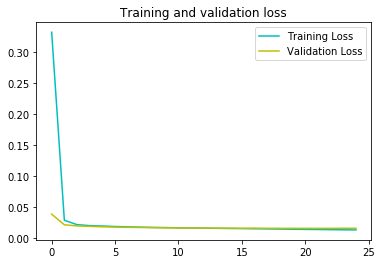

In [14]:
# plotting the losses of training and validation

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'c-', label='Training Loss')
plt.plot(epochs, val_loss, 'y-', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [20]:
# prepare test_features
new_test_features = df_test_features.copy()
# change cp_dose: D1 -> 0, D2 -> 1
new_test_features['cp_dose'] = new_test_features['cp_dose'].map({'D1':0, 'D2':1})
# change cp_time: 24 -> 0, 48 -> 1, 72 -> 2
new_test_features['cp_time'] = new_test_features['cp_time']//24-1
# drop the cp_type and sig_id column
new_test_features.drop(columns = ['sig_id','cp_type'], inplace = True)
new_test_features

,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,0,0,-0.5458,0.1306,-0.5135,0.4408,1.5500,-0.1644,-0.2140,0.2221,...,0.0981,0.7978,-0.1430,-0.2067,-0.2303,-0.1193,0.0210,-0.0502,0.1510,-0.7750
1,2,0,-0.1829,0.2320,1.2080,-0.4522,-0.3652,-0.3319,-1.8820,0.4022,...,-0.1190,-0.1852,-1.0310,-1.3670,-0.3690,-0.5382,0.0359,-0.4764,-1.3810,-0.7300
2,0,0,0.1852,-0.1404,-0.3911,0.1310,-1.4380,0.2455,-0.3390,-0.3206,...,-0.2261,0.3370,-1.3840,0.8604,-1.9530,-1.0140,0.8662,1.0160,0.4924,-0.1942
3,0,1,0.4828,0.1955,0.3825,0.4244,-0.5855,-1.2020,0.5998,-0.1799,...,0.1260,0.1570,-0.1784,-1.1200,-0.4325,-0.9005,0.8131,-0.1305,0.5645,-0.5809
4,1,0,-0.3979,-1.2680,1.9130,0.2057,-0.5864,-0.0166,0.5128,0.6365,...,0.4965,0.7578,-0.1580,1.0510,0.5742,1.0900,-0.2962,-0.5313,0.9931,1.8380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3977,0,0,0.4571,-0.5743,3.3930,-0.6202,0.8557,1.6240,0.0640,-0.6316,...,-1.1790,-0.6422,-0.4367,0.0159,-0.6539,-0.4791,-1.2680,-1.1280,-0.4167,-0.6600
3978,0,0,-0.5885,-0.2548,2.5850,0.3456,0.4401,0.3107,-0.7437,-0.0143,...,0.0210,0.5780,-0.5888,0.8057,0.9312,1.2730,0.2614,-0.2790,-0.0131,-0.0934
3979,2,0,-0.3985,-0.1554,0.2677,-0.6813,0.0152,0.4791,-0.0166,0.7501,...,0.4418,0.9153,-0.1862,0.4049,0.9568,0.4666,0.0461,0.5888,-0.4205,-0.1504
3980,1,1,-1.0960,-1.7750,-0.3977,1.0160,-1.3350,-0.2207,-0.3611,-1.3020,...,0.3079,-0.4473,-0.8192,0.7785,0.3133,0.1286,-0.2618,0.5074,0.7430,-0.0484


In [21]:
# predict values for test_features
test_predict = model.predict(new_test_features)
test_predict

array([[1.2294977e-04, 3.4523010e-04, 1.6047060e-03, ..., 8.9436769e-04,
        2.0524859e-04, 4.6479702e-04],
       [2.7563117e-05, 5.2121282e-04, 9.8252296e-04, ..., 1.4473796e-03,
        6.0763955e-04, 5.3218603e-03],
       [2.5269275e-05, 4.5254168e-05, 2.5036037e-03, ..., 2.6740432e-03,
        5.5125356e-04, 9.8258257e-04],
       ...,
       [5.3820014e-04, 1.5130639e-04, 4.3123960e-04, ..., 6.8971515e-04,
        5.3691936e-05, 8.4856153e-04],
       [1.3882220e-03, 3.5771728e-04, 1.1770725e-03, ..., 1.1484623e-03,
        1.3616681e-04, 3.0893087e-03],
       [5.3776490e-05, 4.3997169e-04, 9.1710687e-04, ..., 1.0722379e-03,
        8.2325707e-05, 2.1590535e-04]], dtype=float32)

In [22]:
df_sample_submission.head()
sub = df_sample_submission.copy()
sig_ids = sub.sig_id
sub.drop(columns = ['sig_id'],inplace = True)
# add predicted values to sub
sub[:] = test_predict
# add the sig_id column back
sub.insert(0, "sig_id", sig_ids, True)
sub
# write sub to submission.csv file
sub.to_csv('submission.csv', index = False)